In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.decomposition import PCA


In [3]:
df = pd.read_csv(r"C:\Users\abdoa\Desktop\ai\ML\breast cancer\data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 569 entries, 0 to 568

Data columns (total 33 columns):

 #   Column                   Non-Null Count  Dtype  

---  ------                   --------------  -----  

 0   id                       569 non-null    int64  

 1   diagnosis                569 non-null    object 

 2   radius_mean              569 non-null    float64

 3   texture_mean             569 non-null    float64

 4   perimeter_mean           569 non-null    float64

 5   area_mean                569 non-null    float64

 6   smoothness_mean          569 non-null    float64

 7   compactness_mean         569 non-null    float64

 8   concavity_mean           569 non-null    float64

 9   concave points_mean      569 non-null    float64

 10  symmetry_mean            569 non-null    float64

 11  fractal_dimension_mean   569 non-null    float64

 12  radius_se                569 non-null    float64

 13  texture_se               569 non-null    float64

 14  perimet

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
df.isnull().sum()*100/len(df)

id                           0.0
diagnosis                    0.0
radius_mean                  0.0
texture_mean                 0.0
perimeter_mean               0.0
area_mean                    0.0
smoothness_mean              0.0
compactness_mean             0.0
concavity_mean               0.0
concave points_mean          0.0
symmetry_mean                0.0
fractal_dimension_mean       0.0
radius_se                    0.0
texture_se                   0.0
perimeter_se                 0.0
area_se                      0.0
smoothness_se                0.0
compactness_se               0.0
concavity_se                 0.0
concave points_se            0.0
symmetry_se                  0.0
fractal_dimension_se         0.0
radius_worst                 0.0
texture_worst                0.0
perimeter_worst              0.0
area_worst                   0.0
smoothness_worst             0.0
compactness_worst            0.0
concavity_worst              0.0
concave points_worst         0.0
symmetry_w

In [7]:
df.duplicated().sum()*100/len(df)

0.0

In [8]:
df.drop(["Unnamed: 32","id"],axis=1,inplace=True)

C:\Users\abdoa\AppData\Local\Temp\ipykernel_5456\661163509.py:4: FutureWarning: 



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



  sns.barplot(x=dia.values, y=dia.index, ax=ax[0], palette='husl')


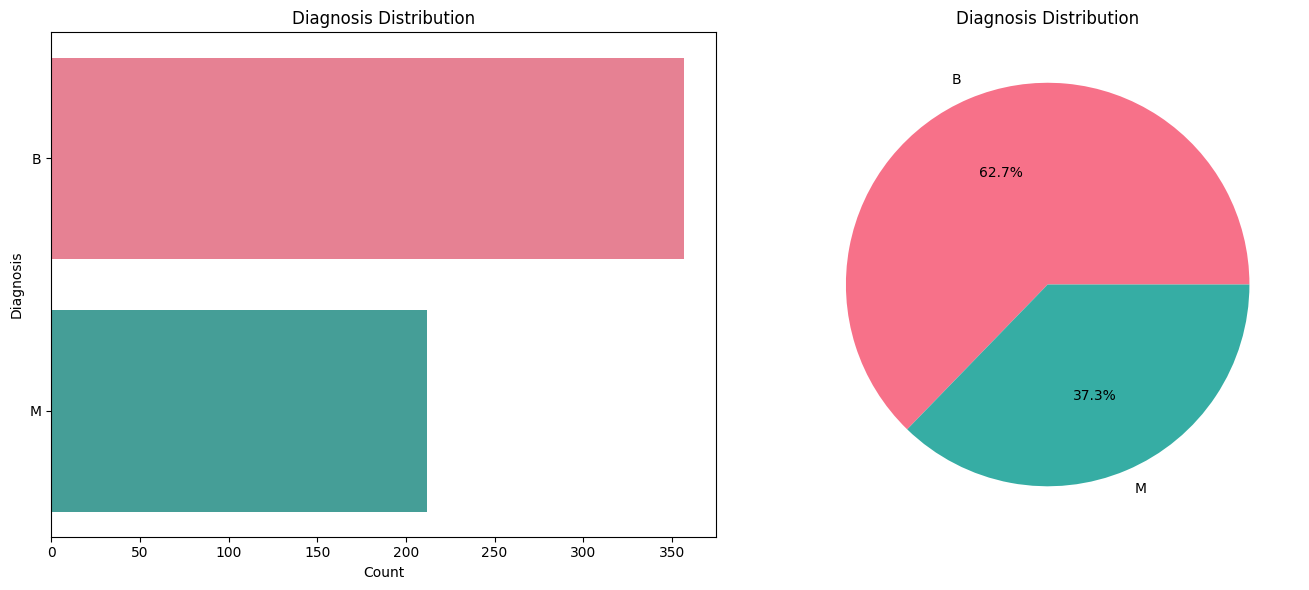

In [9]:
dia = df["diagnosis"].value_counts()
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=dia.values, y=dia.index, ax=ax[0], palette='husl')
ax[0].set_title('Diagnosis Distribution')
ax[0].set_xlabel('Count')
ax[0].set_ylabel('Diagnosis')

ax[1].pie(dia, labels=dia.index, autopct='%1.1f%%', colors=sns.color_palette('husl', len(dia)))
ax[1].set_title('Diagnosis Distribution')
plt.tight_layout()
plt.show()

In [10]:
labelencoder = LabelEncoder()

for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = labelencoder.fit_transform(df[i])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
X=df.drop("diagnosis",axis=1)
Y=df["diagnosis"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [13]:
knnmodel = KNeighborsClassifier(n_neighbors=5)
knnmodel.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
logisticmodel = LogisticRegression()
logisticmodel.fit(X_train, y_train)

c:\Users\abdoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
Logistic_predictions=logisticmodel.predict(X_test)
Logistic_accuracy=accuracy_score(y_test, Logistic_predictions)

In [16]:
knn_predictions = knnmodel.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)

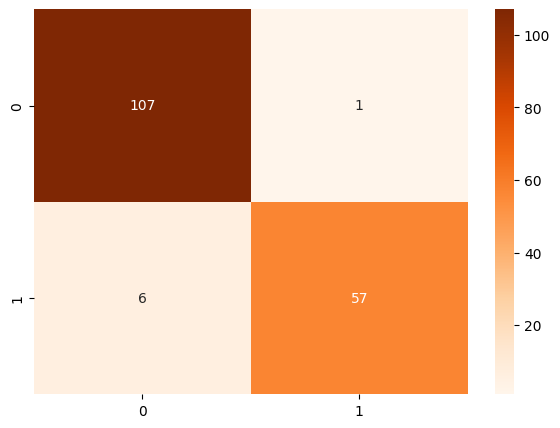

In [17]:
cm = confusion_matrix(y_test,knn_predictions)
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True,fmt="d",cmap="Oranges")
plt.show()

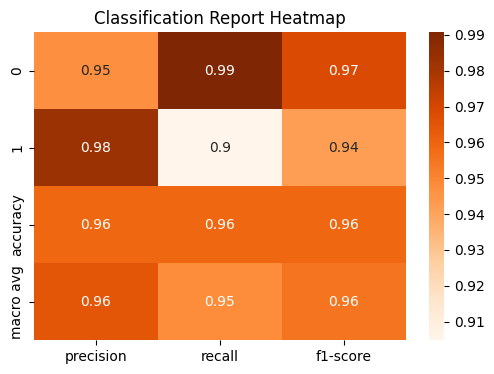

In [18]:
report = classification_report(y_test, knn_predictions, output_dict=True)
df_report = pd.DataFrame(report).transpose()
plt.figure(figsize=(6, 4))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='Oranges')
plt.title('Classification Report Heatmap')
plt.show()

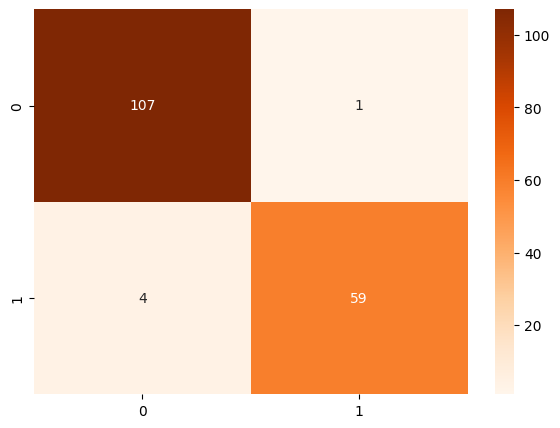

In [19]:
cm = confusion_matrix(y_test,Logistic_predictions)
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True,fmt="d",cmap="Oranges")
plt.show()

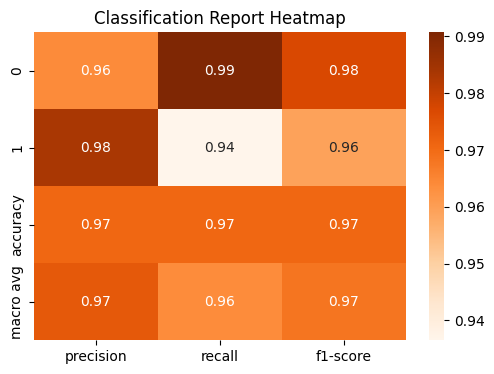

In [20]:
report = classification_report(y_test, Logistic_predictions, output_dict=True)
df_report = pd.DataFrame(report).transpose()
plt.figure(figsize=(6, 4))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='Oranges')
plt.title('Classification Report Heatmap')
plt.show()

In [21]:
print(f'KNN Accuracy: {(knn_accuracy*100):.2f}')
print(f'Logistic_accuracy: {(Logistic_accuracy*100):.2f}')

KNN Accuracy: 95.91

Logistic_accuracy: 97.08
